<a href="https://colab.research.google.com/github/ADITYASHAH-IITP/HandWritten_Digit_Recognition/blob/main/HandWritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf

In [58]:
tf.__version__

'2.7.0'

#HandWritten_Digit_Recognition


---




In [59]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax,Conv2D,MaxPooling2D

#Preparing Layers 

In [60]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


#Preparing Optimizer,Loss and metrics

In [61]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Preparing dataset


In [62]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd


In [63]:
mnist_data=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist_data.load_data()
# reshape dataset to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


# one hot encode target values
train_labels = to_categorical(train_labels)
test_labels= to_categorical(test_labels)

In [64]:
train_images.shape

(60000, 28, 28, 1)

#Img Visualization

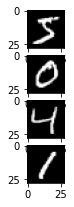

In [65]:
for i in range(4):
	# define subplot
	plt.subplot(5,1,i+1)
	# plot raw pixel data
	test_image=train_images[i]
	test_image=test_image.reshape(28, 28)
	plt.imshow(test_image, cmap=plt.get_cmap('gray'))
	
# show the figure
plt.show()

#Labels Used For Clothes entity

#Rescaling Images

In [66]:
train_images=train_images/255.
test_images=test_images/255.
# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

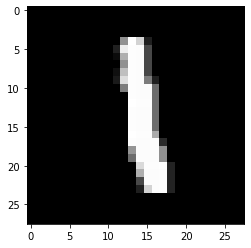

label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [67]:

random_inx=6
i=random_inx
test_image=train_images[random_inx]
test_image=test_image.reshape(28, 28)
plt.imshow(test_image, cmap=plt.get_cmap('gray'))
plt.show()
print(f"label: {train_labels[i]}")

#Training

In [68]:
history=model.fit(train_images,train_labels,epochs=25,batch_size=32,validation_data=(test_images, test_labels),verbose=2)


Epoch 1/25
1875/1875 - 9s - loss: 2.2848 - accuracy: 0.1441 - val_loss: 2.2450 - val_accuracy: 0.1010 - 9s/epoch - 5ms/step
Epoch 2/25
1875/1875 - 8s - loss: 1.5508 - accuracy: 0.5448 - val_loss: 0.6841 - val_accuracy: 0.8168 - 8s/epoch - 4ms/step
Epoch 3/25
1875/1875 - 8s - loss: 0.5134 - accuracy: 0.8528 - val_loss: 0.3967 - val_accuracy: 0.8884 - 8s/epoch - 4ms/step
Epoch 4/25
1875/1875 - 8s - loss: 0.3958 - accuracy: 0.8829 - val_loss: 0.3557 - val_accuracy: 0.8953 - 8s/epoch - 4ms/step
Epoch 5/25
1875/1875 - 8s - loss: 0.3590 - accuracy: 0.8949 - val_loss: 0.3388 - val_accuracy: 0.9004 - 8s/epoch - 4ms/step
Epoch 6/25
1875/1875 - 8s - loss: 0.3327 - accuracy: 0.9018 - val_loss: 0.2904 - val_accuracy: 0.9165 - 8s/epoch - 4ms/step
Epoch 7/25
1875/1875 - 8s - loss: 0.3083 - accuracy: 0.9089 - val_loss: 0.2763 - val_accuracy: 0.9185 - 8s/epoch - 4ms/step
Epoch 8/25
1875/1875 - 8s - loss: 0.3049 - accuracy: 0.9118 - val_loss: 0.2718 - val_accuracy: 0.9234 - 8s/epoch - 4ms/step
Epoch 9/

In [75]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.284848,0.144050,2.244976,0.1010
1,1.550773,0.544817,0.684129,0.8168
2,0.513376,0.852783,0.396666,0.8884
3,0.395813,0.882917,0.355742,0.8953
4,0.358978,0.894900,0.338770,0.9004


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

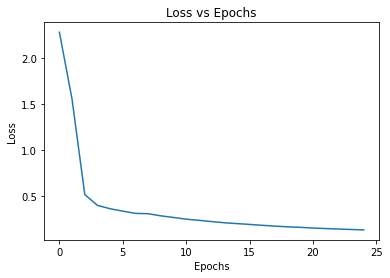

In [76]:
loss_plot=df.plot(y="loss",title="Loss vs Epochs",legend=False)
loss_plot.set(xlabel="Epochs",ylabel="Loss")

#Prediction

In [77]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)  

313/313 [==============================] - 1s 4ms/step - loss: 0.1313 - accuracy: 0.9611


In [78]:
test_images.shape[0]

10000

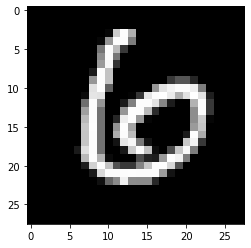

Actual label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [83]:
random_inx=np.random.choice(test_images.shape[0])
test_image=test_images[random_inx]
test_image=test_image.reshape(28, 28)
plt.imshow(test_image, cmap=plt.get_cmap('gray'))
plt.show()
print(f"Actual label: {test_labels[random_inx]}")

In [87]:
prediction=model.predict(test_image[np.newaxis,...,np.newaxis])
print(prediction)
print(f"Model Prediction: {np.argmax(prediction)}")

[[1.41696786e-04 1.46666036e-06 1.05123516e-04 3.02714143e-05
  2.85580300e-05 2.29455225e-04 9.97570217e-01 3.21856213e-08
  1.89314934e-03 8.84513582e-08]]
Model Prediction: 6


**So the prediction and the actual labels matches**